In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report , roc_auc_score
from sklearn.model_selection import GridSearchCV

In [8]:
from google.colab import drive
#drive.mount('/content/drive')
#df=pd.read_csv("/content/drive/My Drive/SKS ML project/Telco_Customer_Churn_feature_selected.csv")
df=pd.read_csv("/../datasets/Telco_Customer_Churn_feature_selected.csv")

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [9]:
X=df.drop('Churn',axis=1)
y=df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine": SVC(),
    "XGBoost": XGBClassifier()
}

In [10]:
for model in models:
    clf=models[model]
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print(f"Model: {model}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")

Model: Logistic Regression
Accuracy: 0.7825159914712153
Precision: 0.6103896103896104
Recall: 0.5026737967914439
F1 Score: 0.5513196480938416
ROC AUC Score: 0.6932536457335728
Confusion Matrix:
 [[913 120]
 [186 188]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.86      1033
           1       0.61      0.50      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.78      1407



Model: Random Forest
Accuracy: 0.7810945273631841
Precision: 0.6178571428571429
Recall: 0.4625668449197861
F1 Score: 0.5290519877675841
ROC AUC Score: 0.6794925221694768
Confusion Matrix:
 [[926 107]
 [201 173]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.62      0.46      0.53       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.69      1407
weighted avg       0.77      0.78      0.77      1407



Model: Decision Tree
Accuracy: 0.7242359630419332
Precision: 0.4825
Recall: 0.5160

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

Model: XGBoost
Accuracy: 0.7640369580668088
Precision: 0.5652173913043478
Recall: 0.48663101604278075
F1 Score: 0.5229885057471264
ROC AUC Score: 0.6755517132488831
Confusion Matrix:
 [[893 140]
 [192 182]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84      1033
           1       0.57      0.49      0.52       374

    accuracy                           0.76      1407
   macro avg       0.69      0.68      0.68      1407
weighted avg       0.75      0.76      0.76      1407





In [11]:
from sklearn .preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [12]:
for model in models:
    clf=models[model]
    clf.fit(X_train_scaled,y_train)
    y_pred=clf.predict(X_test_scaled)
    print(f"Model: {model}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")

Model: Logistic Regression
Accuracy: 0.7853589196872779
Precision: 0.6208053691275168
Recall: 0.4946524064171123
F1 Score: 0.5505952380952381
ROC AUC Score: 0.6926311402850324
Confusion Matrix:
 [[920 113]
 [189 185]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



Model: Random Forest
Accuracy: 0.7874911158493249
Precision: 0.6325088339222615
Recall: 0.4786096256684492
F1 Score: 0.5449010654490106
ROC AUC Score: 0.688965993860362
Confusion Matrix:
 [[929 104]
 [195 179]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.48      0.54       374

    accuracy                  

In [13]:
# trying hyperparameter tuning for the models all models
params = {
    "Logistic Regression": {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'saga'],
        'class_weight': [None, 'balanced']
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'class_weight': [None, 'balanced']
    },
    "Decision Tree": {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'class_weight': [None, 'balanced']
    },
    "Support Vector Machine": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly'],
        'class_weight': [None, 'balanced']
    },
    "XGBoost": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'class_weight': [None, 'balanced']
    }
}
for model in models:
    clf=models[model]
    grid=GridSearchCV(clf,params[model],cv=5,n_jobs=-1,verbose=2)
    grid.fit(X_train_scaled,y_train)
    print(f"Best parameters for {model}: {grid.best_params_}")
    best_clf=grid.best_estimator_
    y_pred=best_clf.predict(X_test_scaled)
    print(f"Model: {model}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for Logistic Regression: {'C': 0.1, 'class_weight': None, 'solver': 'saga'}
Model: Logistic Regression
Accuracy: 0.7867803837953091
Precision: 0.625
Recall: 0.4946524064171123
F1 Score: 0.5522388059701493
ROC AUC Score: 0.6935991944960682
Confusion Matrix:
 [[922 111]
 [189 185]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters for Random Forest: {'class_weight': None, 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Model: Random Forest
Accuracy: 0.7974413646055437
Precision: 0.6606498194945848
Recall: 0.4893048128342246

In [14]:
param_grid_lr_simple = {
	"penalty": ["l1", "l2"],
	"C": [0.01, 0.1, 1, 10],
	"solver": ["liblinear"],  # supports l1 and l2
	"class_weight": ["balanced"]
}

grid = GridSearchCV(LogisticRegression(), param_grid_lr_simple, cv=5, n_jobs=-1, verbose=2)
grid.fit(X_train_scaled, y_train)
print(f"Best parameters for Logistic Regression: {grid.best_params_}")
best_clf = grid.best_estimator_
y_pred = best_clf.predict(X_test_scaled)
print(f"Model: Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for Logistic Regression: {'C': 1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Model: Logistic Regression
Accuracy: 0.7370291400142146
Precision: 0.5033222591362126
Recall: 0.8101604278074866
F1 Score: 0.6209016393442623
ROC AUC Score: 0.7603561093538885
Confusion Matrix:
 [[734 299]
 [ 71 303]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.71      0.80      1033
           1       0.50      0.81      0.62       374

    accuracy                           0.74      1407
   macro avg       0.71      0.76      0.71      1407
weighted avg       0.80      0.74      0.75      1407



In [15]:
param_grid_rf = {
    "n_estimators": [100, 200, 300],
    "max_depth": [5, 10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"],
    "class_weight": ["balanced"]
}

In [16]:
grid=GridSearchCV(RandomForestClassifier(),param_grid_rf,cv=5,n_jobs=-1,verbose=2)
grid.fit(X_train_scaled,y_train)
print(f"Best parameters for RandomForestClassifier: {grid.best_params_}")
best_clf=grid.best_estimator_
y_pred=best_clf.predict(X_test_scaled)
print(f"Model: RandomForestClassifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters for RandomForestClassifier: {'class_weight': 'balanced', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Model: RandomForestClassifier
Accuracy: 0.7882018479033405
Precision: 0.6407407407407407
Recall: 0.4625668449197861
F1 Score: 0.5372670807453416
ROC AUC Score: 0.6843327932246558
Confusion Matrix:
 [[936  97]
 [201 173]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.64      0.46      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.78      1407



In [17]:
param_grid_dt = {
    "max_depth": [5, 10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["gini", "entropy"],
    "class_weight": ["balanced"]
}

In [18]:
grid=GridSearchCV(DecisionTreeClassifier(),param_grid_dt,cv=5,n_jobs=-1,verbose=2)
grid.fit(X_train_scaled,y_train)
print(f"Best parameters for DecisionTreeClassifier: {grid.best_params_}")
best_clf=grid.best_estimator_
y_pred=best_clf.predict(X_test_scaled)
print(f"Model: DecisionTreeClassifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters for DecisionTreeClassifier: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Model: DecisionTreeClassifier
Accuracy: 0.7292110874200426
Precision: 0.49364791288566245
Recall: 0.7272727272727273
F1 Score: 0.5881081081081081
ROC AUC Score: 0.728592801196867
Confusion Matrix:
 [[754 279]
 [102 272]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.73      0.80      1033
           1       0.49      0.73      0.59       374

    accuracy                           0.73      1407
   macro avg       0.69      0.73      0.69      1407
weighted avg       0.78      0.73      0.74      1407



In [19]:
param_grid_svc = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf"],
    "gamma": ["scale", "auto"],
    "class_weight": ["balanced"]
}

In [20]:
grid=GridSearchCV(SVC(),param_grid_svc,cv=5,n_jobs=-1,verbose=2)
grid.fit(X_train_scaled,y_train)
print(f"Best parameters for SVC: {grid.best_params_}")
best_clf=grid.best_estimator_
y_pred=best_clf.predict(X_test_scaled)
print(f"Model: SVC")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for SVC: {'C': 1, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf'}
Model: SVC
Accuracy: 0.7306325515280739
Precision: 0.4956369982547993
Recall: 0.7593582887700535
F1 Score: 0.5997888067581837
ROC AUC Score: 0.739795310890351
Confusion Matrix:
 [[744 289]
 [ 90 284]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.72      0.80      1033
           1       0.50      0.76      0.60       374

    accuracy                           0.73      1407
   macro avg       0.69      0.74      0.70      1407
weighted avg       0.79      0.73      0.74      1407



In [21]:
param_grid_xgb = {
    "n_estimators": [100, 200, 500],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
}

In [22]:
grid=GridSearchCV(XGBClassifier(),param_grid_xgb,cv=5,n_jobs=-1,verbose=2)
grid.fit(X_train_scaled,y_train)
print(f"Best parameters for XGBClassifier: {grid.best_params_}")
best_clf=grid.best_estimator_
y_pred=best_clf.predict(X_test_scaled)
print(f"Model: XGBClassifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for XGBClassifier: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 1.0}
Model: XGBClassifier
Accuracy: 0.7938877043354655
Precision: 0.6544117647058824
Recall: 0.47593582887700536
F1 Score: 0.5510835913312694
ROC AUC Score: 0.6924693665198193
Confusion Matrix:
 [[939  94]
 [196 178]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.65      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



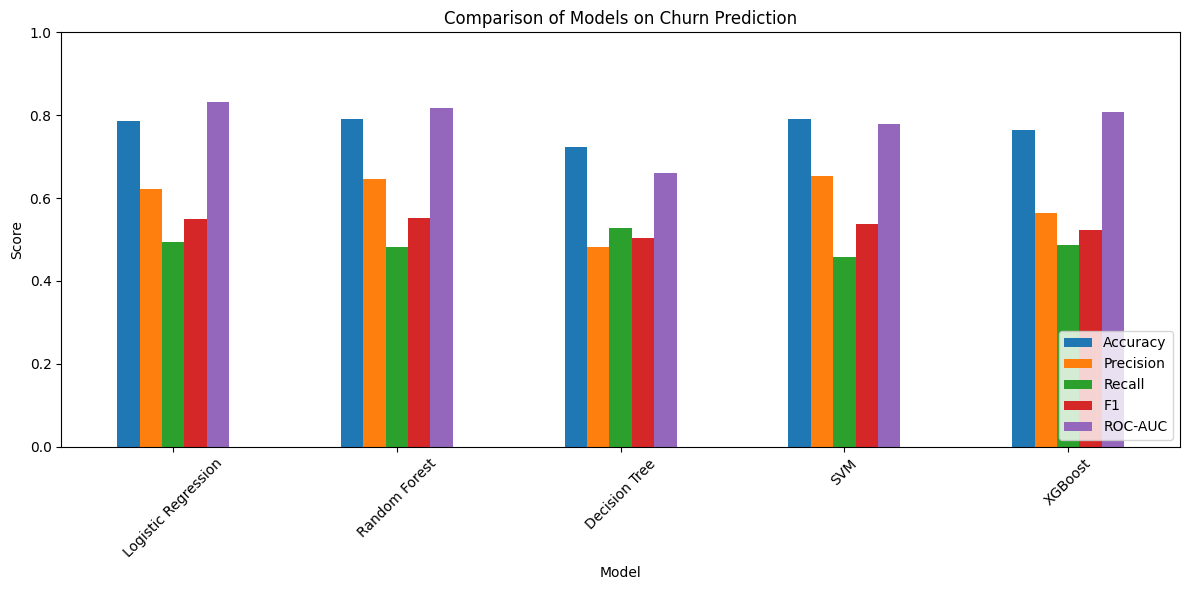

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming you already have:
# X_train_scaled, X_test_scaled, y_train, y_test
# and your models dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True),  # probability=True needed for ROC-AUC
    "XGBoost": XGBClassifier()
}

# Store metrics
metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1": [],
    "ROC-AUC": []
}

# Evaluate models
for name, clf in models.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    if hasattr(clf, "predict_proba"):
        y_prob = clf.predict_proba(X_test_scaled)[:, 1]
    else:  # for SVC without predict_proba
        y_prob = clf.decision_function(X_test_scaled)
        y_prob = (y_prob - y_prob.min()) / (y_prob.max() - y_prob.min())  # normalize to [0,1]

    metrics["Model"].append(name)
    metrics["Accuracy"].append(accuracy_score(y_test, y_pred))
    metrics["Precision"].append(precision_score(y_test, y_pred))
    metrics["Recall"].append(recall_score(y_test, y_pred))
    metrics["F1"].append(f1_score(y_test, y_pred))
    metrics["ROC-AUC"].append(roc_auc_score(y_test, y_prob))

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics)

# Plotting
metrics_df.set_index("Model", inplace=True)
metrics_df.plot(kind="bar", figsize=(12,6))
plt.title("Comparison of Models on Churn Prediction")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


Random Forest and Logistic Regression are the top-performing models.

Decision Tree is useful if the focus is on maximizing recall (catch all churners).

XGBoost is competitive and could improve with further hyperparameter tuning.